Epoch [1/100], Train Loss: 0.6453, Train Accuracy: 78.67%, Test Loss: 0.5290, Test Accuracy: 81.87%
Epoch [2/100], Train Loss: 0.4791, Train Accuracy: 83.79%, Test Loss: 0.4935, Test Accuracy: 82.76%
Epoch [3/100], Train Loss: 0.4477, Train Accuracy: 84.75%, Test Loss: 0.4707, Test Accuracy: 83.98%
Epoch [4/100], Train Loss: 0.4310, Train Accuracy: 85.24%, Test Loss: 0.4642, Test Accuracy: 83.48%
Epoch [5/100], Train Loss: 0.4200, Train Accuracy: 85.63%, Test Loss: 0.4559, Test Accuracy: 84.05%
Epoch [6/100], Train Loss: 0.4136, Train Accuracy: 85.73%, Test Loss: 0.4477, Test Accuracy: 84.32%
Epoch [7/100], Train Loss: 0.4076, Train Accuracy: 86.03%, Test Loss: 0.4503, Test Accuracy: 84.27%
Epoch [8/100], Train Loss: 0.4029, Train Accuracy: 86.16%, Test Loss: 0.4491, Test Accuracy: 84.27%
Epoch [9/100], Train Loss: 0.3985, Train Accuracy: 86.24%, Test Loss: 0.4511, Test Accuracy: 84.05%
Epoch [10/100], Train Loss: 0.3951, Train Accuracy: 86.36%, Test Loss: 0.4449, Test Accuracy: 84.25%

Epoch [83/100], Train Loss: 0.3524, Train Accuracy: 87.51%, Test Loss: 0.4512, Test Accuracy: 84.47%
Epoch [84/100], Train Loss: 0.3510, Train Accuracy: 87.53%, Test Loss: 0.4527, Test Accuracy: 84.47%
Epoch [85/100], Train Loss: 0.3514, Train Accuracy: 87.63%, Test Loss: 0.4608, Test Accuracy: 84.00%
Epoch [86/100], Train Loss: 0.3514, Train Accuracy: 87.51%, Test Loss: 0.4519, Test Accuracy: 84.31%
Epoch [87/100], Train Loss: 0.3521, Train Accuracy: 87.50%, Test Loss: 0.4681, Test Accuracy: 83.80%
Epoch [88/100], Train Loss: 0.3510, Train Accuracy: 87.59%, Test Loss: 0.4602, Test Accuracy: 84.14%
Epoch [89/100], Train Loss: 0.3517, Train Accuracy: 87.48%, Test Loss: 0.4595, Test Accuracy: 84.22%
Epoch [90/100], Train Loss: 0.3507, Train Accuracy: 87.56%, Test Loss: 0.4523, Test Accuracy: 84.34%
Epoch [91/100], Train Loss: 0.3503, Train Accuracy: 87.61%, Test Loss: 0.4560, Test Accuracy: 84.46%
Epoch [92/100], Train Loss: 0.3508, Train Accuracy: 87.48%, Test Loss: 0.4523, Test Accurac

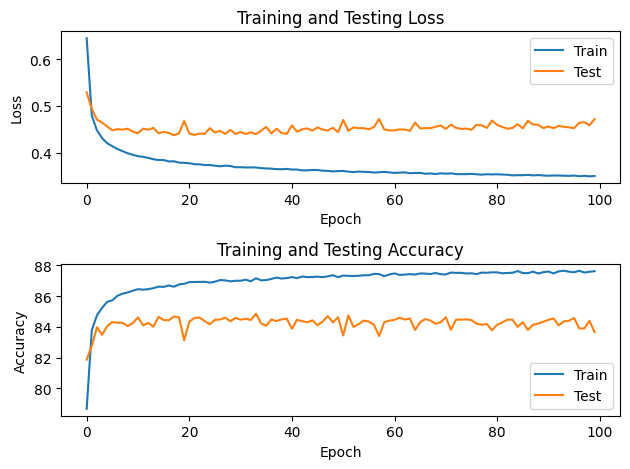

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 设置随机种子
torch.manual_seed(42)

# 定义超参数
batch_size = 64
learning_rate = 0.001
num_epochs =100
num_workers=32

# 加载Fashion-MNIST数据集
train_dataset = FashionMNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = FashionMNIST(root='data/', train=False, transform=transforms.ToTensor())

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False,num_workers=num_workers)

# 定义模型
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SoftmaxRegression(input_dim=28*28, output_dim=10).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# 训练模型
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    for images, labels in train_loader:
        #转到GPU上
        images = images.to(device)
        labels = labels.to(device)
        # 将图像展平
        images = images.view(-1, 28*28)
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 计算训练集的准确率
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        train_loss += loss.item() * labels.size(0)

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100 * train_correct / train_total

    train_losses.append(train_loss)
    train_accs.append(train_accuracy)

    # 测试阶段
    model.eval()
    test_loss = 0.0
    test_total = 0
    test_correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # 将图像展平
            images = images.view(-1, 28*28)

            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 计算测试集的准确率
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            test_loss += loss.item() * labels.size(0)

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 * test_correct / test_total

    test_losses.append(test_loss)
    test_accs.append(test_accuracy)

    # 打印每个epoch的结果
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# 绘制损失曲线和准确率曲线
plt.subplot(2, 1, 1)
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train_accs, label='Train')
plt.plot(test_accs, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
device

device(type='cuda')